In [1]:
import numpy as np
import pandas as pd

stroke_data = pd.read_csv('stroke.csv')

# 数据预处理部分
# bmi这里直接取平均值填充缺失值

bmi_mean = stroke_data['bmi'].mean()
stroke_data['bmi'].fillna(bmi_mean,inplace=True)
# 采取整数编码替换部分原始的数据
stroke_data['ever_married'] = stroke_data['ever_married'].map({'Yes': 1, 'No': 0})

stroke_data['gender'] = stroke_data['gender'].map({'Female': 1, 'Male': 0})
                                                  
stroke_data['work_type'] = stroke_data['work_type'].map({'children': 0, 'Govt_job': 1, 'Self-employed': 2, 'Private':3})

stroke_data['Residence_type'] = stroke_data['Residence_type'].map({'Urban':0,'Rural':1})

stroke_data['smoking_status'] = stroke_data['smoking_status'].map({'never smoked':0, 'formerly smoked':1, 'smokes':2,'Unknown':3})

print(stroke_data.head())

      id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046     0.0  67.0             0              1             1        3.0   
1  51676     1.0  61.0             0              0             1        2.0   
2  31112     0.0  80.0             0              1             1        3.0   
3  60182     1.0  49.0             0              0             1        3.0   
4   1665     1.0  79.0             1              0             1        2.0   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               0             228.69  36.600000               1       1  
1               1             202.21  28.893237               0       1  
2               1             105.92  32.500000               0       1  
3               0             171.23  34.400000               2       1  
4               1             174.12  24.000000               0       1  


C:\Users\leishen\AppData\Local\Temp\ipykernel_25872\132685304.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stroke_data['bmi'].fillna(bmi_mean,inplace=True)


d:\Anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 30382 (\N{CJK UNIFIED IDEOGRAPH-76AE}) missing from font(s) Arial.
  fig.canvas.draw()
d:\Anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 23572 (\N{CJK UNIFIED IDEOGRAPH-5C14}) missing from font(s) Arial.
  fig.canvas.draw()
d:\Anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 36874 (\N{CJK UNIFIED IDEOGRAPH-900A}) missing from font(s) Arial.
  fig.canvas.draw()
d:\Anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) Arial.
  fig.canvas.draw()
d:\Anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) Arial.
  fig.canvas.draw()
d:\Anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from font(s) Arial.
  fig.canvas.draw()
d:\Anaconda3\Lib\site-packages\seaborn\utils.py:61: 

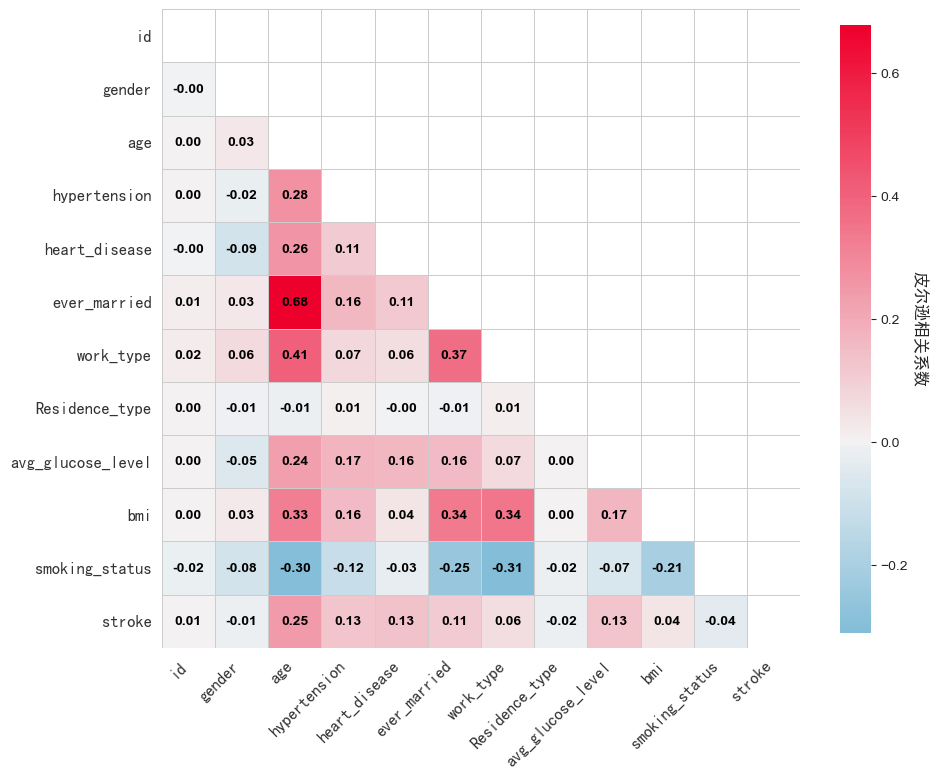

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import font_manager
%matplotlib inline

# 方法1：直接指定系统字体路径（Windows示例）
font_path = 'C:/Windows/Fonts/simhei.ttf'  # 黑体路径
# 或使用宋体：'C:/Windows/Fonts/simsun.ttc'

# 方法2：动态检测可用中文字体（跨平台兼容）
system_fonts = [f.name for f in font_manager.fontManager.ttflist]
chinese_fonts = ['SimHei', 'Microsoft YaHei', 'SimSun', 'STKaiti']
available_fonts = [f for f in chinese_fonts if f in system_fonts]

# 创建字体属性对象
if available_fonts:
    zh_font = font_manager.FontProperties(fname=font_path if 'simhei' in font_path.lower() else None,
                                        family=available_fonts[0])
else:
    zh_font = font_manager.FontProperties(family='sans-serif')

# 计算相关度矩阵
correlation_matrix = stroke_data.corr()

# 设置图形风格
sns.set_style("white", {
    'axes.edgecolor': '0.3',
    'grid.color': '0.9'
})

# 创建图形
plt.figure(figsize=(10, 8.2))

# 创建上三角遮罩
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# 使用极限鲜艳红蓝渐变
cmap = sns.diverging_palette(240, 10, s=100, l=50, sep=1, as_cmap=True)

# 绘制热力图
ax = sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    center=0,
    square=True,
    linewidths=0.5,
    linecolor='0.8',
    cbar_kws={
        "shrink": 0.9,
        "aspect": 20,
        "label": "皮尔逊相关系数"  # 修改为中文
    },
    annot_kws={
        "color": "black",
        "fontsize": 10,
        "fontweight": "bold"
    }
)

# 色带优化
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.label.set_fontproperties(zh_font)  # 应用中文字体
cbar.ax.set_ylabel("皮尔逊相关系数", rotation=270, labelpad=15, fontsize=12)
cbar.outline.set_edgecolor('0.3')

# 网格线封闭
ax.axvline(x=len(correlation_matrix), color='0.3', linewidth=0.5)

# 标签设置（统一应用字体）
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(zh_font)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    ha='right',
    fontsize=12,
    color='0.2'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    fontsize=12,
    color='0.2'
)

# 输出
plt.tight_layout(rect=[0, 0, 0.98, 1])
plt.savefig('./heatmap/stroke_heatmap.png', dpi=1080, bbox_inches='tight')
plt.show()

In [3]:
# 处理心脏病数据集

heart_data = pd.read_csv('heart.csv')

heart_data['Sex'] = heart_data['Sex'].map({'F':1,'M':0})
heart_data['ChestPainType'] = heart_data['ChestPainType'].map({'TA':3,'ATA':2,'NAP':1,'ASY':0})
heart_data['ExerciseAngina'] = heart_data['ExerciseAngina'].map({'Y':1,'N':0})  # 是否运动性诱发心脏病
heart_data['RestingECG'] = heart_data['RestingECG'].map({'Normal':0,'ST':1,'LVH':2})
heart_data['ST_Slope'] = heart_data['ST_Slope'].map({'Up':0,'Flat':1,'Down':2})

heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,2,130,283,0,1,98,0,0.0,0,0
3,48,1,0,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


d:\Anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 30382 (\N{CJK UNIFIED IDEOGRAPH-76AE}) missing from font(s) Arial.
  fig.canvas.draw()
d:\Anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 23572 (\N{CJK UNIFIED IDEOGRAPH-5C14}) missing from font(s) Arial.
  fig.canvas.draw()
d:\Anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 36874 (\N{CJK UNIFIED IDEOGRAPH-900A}) missing from font(s) Arial.
  fig.canvas.draw()
d:\Anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) Arial.
  fig.canvas.draw()
d:\Anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) Arial.
  fig.canvas.draw()
d:\Anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from font(s) Arial.
  fig.canvas.draw()
d:\Anaconda3\Lib\site-packages\seaborn\utils.py:61: 

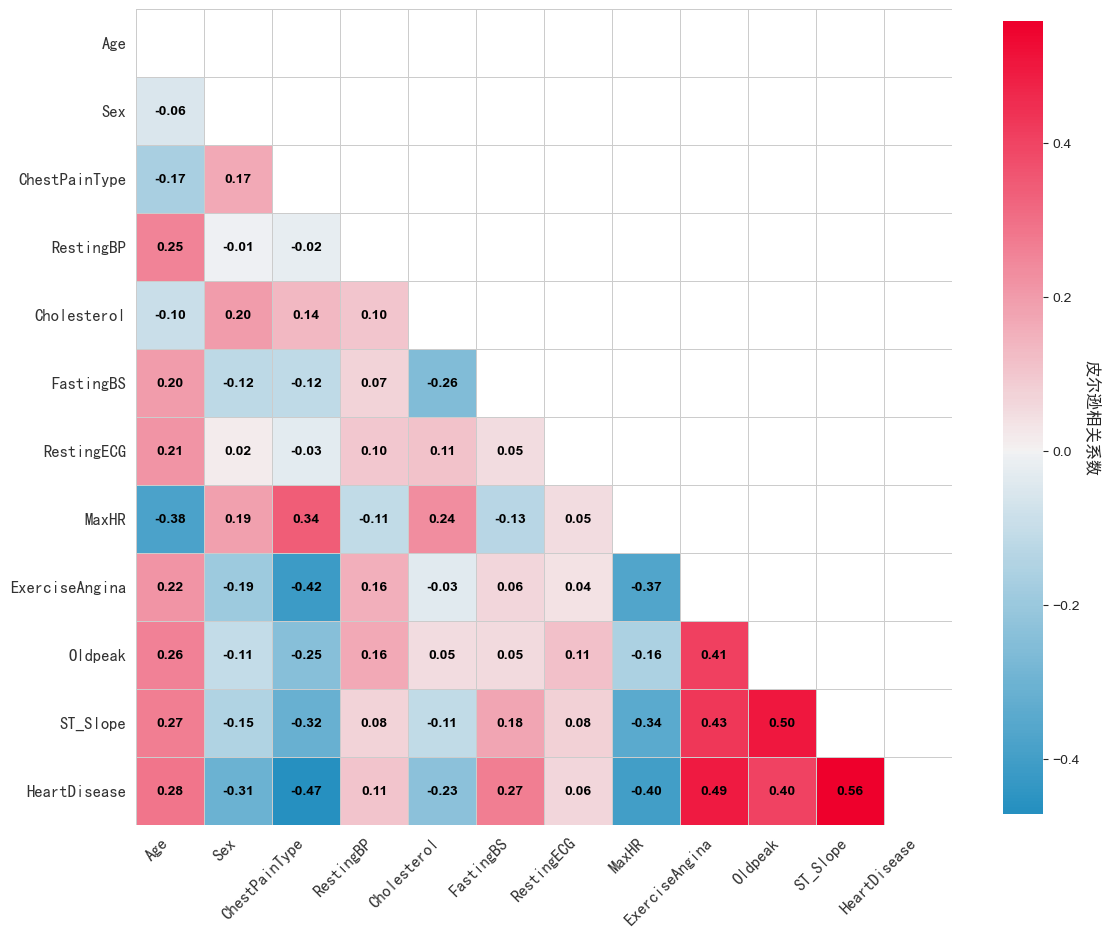

In [4]:
# 计算相关度矩阵
correlation_matrix_heart = heart_data.corr()

# 设置图形风格
sns.set_style("white", {
    'axes.edgecolor': '0.3',
    'grid.color': '0.9'
})

# 创建图形
plt.figure(figsize=(12, 10))

# 创建上三角遮罩
mask = np.triu(np.ones_like(correlation_matrix_heart, dtype=bool))

# 使用鲜艳红蓝渐变
cmap = sns.diverging_palette(240, 10, s=100, l=50, sep=1, as_cmap=True)

# 绘制热力图
ax = sns.heatmap(
    correlation_matrix_heart,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    center=0,
    square=True,
    linewidths=0.5,
    linecolor='0.8',
    cbar_kws={
        "shrink": 0.9,
        "aspect": 20,
        "label": "皮尔逊相关系数"  # 修改为中文
    },
    annot_kws={
        "color": "black",
        "fontsize": 10,
        "fontweight": "bold"
    }
)

# 色带优化
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.label.set_fontproperties(zh_font)  # 应用中文字体
cbar.ax.set_ylabel("皮尔逊相关系数", rotation=270, labelpad=15, fontsize=12)
cbar.outline.set_edgecolor('0.3')

# 网格线封闭
ax.axvline(x=len(correlation_matrix_heart), color='0.3', linewidth=0.5)

# 标签设置（统一应用字体）
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(zh_font)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    ha='right',
    fontsize=12,
    color='0.2'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    fontsize=12,
    color='0.2'
)

# 标题设置
# plt.title("心脏病数据特征相关性热力图", fontsize=16, fontproperties=zh_font, pad=20)

# 输出
plt.tight_layout(rect=[0, 0, 0.98, 1])
plt.savefig('./heatmap/heart_heatmap.png', dpi=1080, bbox_inches='tight')
plt.show()

In [5]:
# 肝病年龄这里需要进一步处理，转化成年，这里只分析可行性

cirrhosis_data = pd.read_csv('cirrhosis.csv')

Bilirubin_mean = cirrhosis_data['Bilirubin'].mean()
Cholestrol_mean = cirrhosis_data['Cholesterol'].mean()
Albumin_mean = cirrhosis_data['Albumin'].mean()
Copper_mean = cirrhosis_data['Copper'].mean()
Alk_Phos_mean = cirrhosis_data['Alk_Phos'].mean()
SGOT_mean = cirrhosis_data['SGOT'].mean()
Tryglicerides_mean = cirrhosis_data['Tryglicerides'].mean()
Platelets_mean = cirrhosis_data['Platelets'].mean()

cirrhosis_data.fillna({
    'Bilirubin': Bilirubin_mean,
    'Cholesterol': Cholestrol_mean,
    'Albumin': Albumin_mean,
    'Copper': Copper_mean,
    'Alk_Phos': Alk_Phos_mean,
    'SGOT': SGOT_mean,
    'Tryglicerides': Tryglicerides_mean,
    'Platelets': Platelets_mean,
    'Stage': 3  # 不需要int()转换，Pandas会自动处理
}, inplace=True)

cirrhosis_data['Sex'] = cirrhosis_data['Sex'].map({'M':0,'F':1})
cirrhosis_data['Ascites'] = cirrhosis_data['Ascites'].map({'Y':2,'N':0,'NA':1})
cirrhosis_data['Hepatomegaly'] = cirrhosis_data['Hepatomegaly'].map({'Y':2,'NA':1,'N':0})
cirrhosis_data['Spiders'] = cirrhosis_data['Spiders'].map({'Y':2,'NA':1,'N':0})
cirrhosis_data['Edema'] = cirrhosis_data['Edema'].map({'Y':2,'N':0,'S':1})
cirrhosis_data['Drug'] = cirrhosis_data['Drug'].map({'D-penicillamine':1,'Placebo':0})
cirrhosis_data['Status'] = cirrhosis_data['Status'].map({'C':0,'CL':1,'D':2})

cirrhosis_data.fillna({
    'Ascites':1,
    'Hepatomegaly':1,
    'Spiders':1},
    inplace=True
)

cirrhosis_data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,2,1.0,21464,1,2.0,2.0,2.0,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,0,1.0,20617,1,0.0,2.0,2.0,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,2,1.0,25594,0,0.0,0.0,0.0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,2,1.0,19994,1,0.0,2.0,2.0,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,1,0.0,13918,1,0.0,2.0,2.0,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


d:\Anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 30382 (\N{CJK UNIFIED IDEOGRAPH-76AE}) missing from font(s) Arial.
  fig.canvas.draw()
d:\Anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 23572 (\N{CJK UNIFIED IDEOGRAPH-5C14}) missing from font(s) Arial.
  fig.canvas.draw()
d:\Anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 36874 (\N{CJK UNIFIED IDEOGRAPH-900A}) missing from font(s) Arial.
  fig.canvas.draw()
d:\Anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) Arial.
  fig.canvas.draw()
d:\Anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) Arial.
  fig.canvas.draw()
d:\Anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from font(s) Arial.
  fig.canvas.draw()
d:\Anaconda3\Lib\site-packages\seaborn\utils.py:61: 

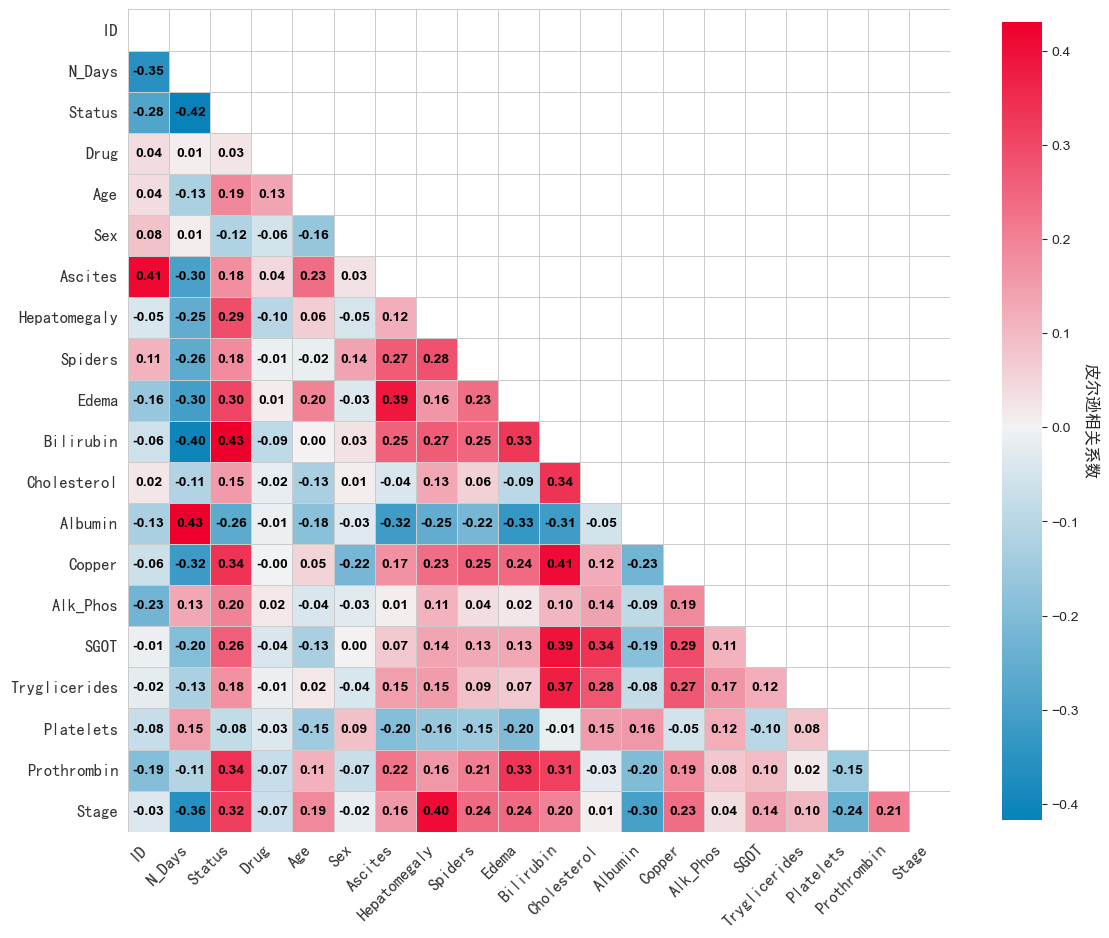

In [6]:
# 计算相关度矩阵
correlation_matrix_cirrhosis = cirrhosis_data.corr()

# 设置图形风格
sns.set_style("white", {
    'axes.edgecolor': '0.3',
    'grid.color': '0.9'
})

# 创建图形
plt.figure(figsize=(12, 10))

# 创建上三角遮罩
mask = np.triu(np.ones_like(correlation_matrix_cirrhosis, dtype=bool))

# 使用与心脏病热力图相同的红蓝渐变配色（240,10色相）
cmap = sns.diverging_palette(240, 10, s=100, l=50, sep=1, as_cmap=True)  # [1,2](@ref)

# 绘制热力图
ax = sns.heatmap(
    correlation_matrix_cirrhosis,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    center=0,
    square=True,
    linewidths=0.5,
    linecolor='0.8',
    cbar_kws={
        "shrink": 0.9,        # 色带宽度比例
        "aspect": 20,         # 色带长宽比
        "label": "皮尔逊相关系数"  # 中文标签
    },
    annot_kws={
        "color": "black",
        "fontsize": 10,
        "fontweight": "bold"
    }
)

# 色带优化（完全匹配心脏病热力图配置）
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.label.set_fontproperties(zh_font)
cbar.ax.set_ylabel("皮尔逊相关系数", 
                  rotation=270, 
                  labelpad=15, 
                  fontsize=12,
                  fontweight='bold')  # 加粗标签
cbar.outline.set_edgecolor('0.3')    # 边框颜色
cbar.ax.tick_params(labelsize=10)     # 刻度字号[6](@ref)

# 网格线封闭
ax.axvline(x=len(correlation_matrix_cirrhosis), color='0.3', linewidth=0.5)

# 标签设置（统一应用字体）
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(zh_font)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    ha='right',
    fontsize=12,
    color='0.2'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    fontsize=12,
    color='0.2'
)

# 标题设置
# plt.title("肝硬化数据特征相关性热力图", 
#           fontsize=16, 
#           fontproperties=zh_font, 
#           pad=20,
#           weight='bold')

# 输出优化
plt.tight_layout(rect=[0, 0, 0.98, 1])
plt.savefig('./heatmap/cirrhosis_heatmap.png', 
            dpi=1080, 
            bbox_inches='tight',
            transparent=False)  # 非透明背景
plt.show()

In [7]:
# save data

# 处理中风数据
stroke_data_save = stroke_data.drop(['gender','id','Residence_type'],axis = 1,inplace = False,errors='ignore')
stroke_data_save.head()
stroke_data_save.to_csv('preparations\stroke_output.csv',index=False)

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\leishen\AppData\Local\Temp\ipykernel_25872\644744461.py:6: SyntaxWarning: invalid escape sequence '\s'
  stroke_data_save.to_csv('preparations\stroke_output.csv',index=False)


In [8]:
heart_data.to_csv('preparations\heart_output.csv',index=False)

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\leishen\AppData\Local\Temp\ipykernel_25872\840316368.py:1: SyntaxWarning: invalid escape sequence '\h'
  heart_data.to_csv('preparations\heart_output.csv',index=False)


In [9]:
cirrhosis_data_saved = cirrhosis_data.drop(['ID','Sex','Cholesterol','Drug','Alk_Phos'],axis=1,inplace=False,errors='ignore')
# 小于0.1的全部删除了
cirrhosis_data_saved.head()
cirrhosis_data_saved.to_csv('preparations\cirrhosis_output.csv',index=False)

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
C:\Users\leishen\AppData\Local\Temp\ipykernel_25872\1350510670.py:4: SyntaxWarning: invalid escape sequence '\c'
  cirrhosis_data_saved.to_csv('preparations\cirrhosis_output.csv',index=False)


In [10]:
import torch

# 最后统一将预处理的数据导出

ModuleNotFoundError: No module named 'torch'